In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | abu samrah
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | saskylakh
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | saint george
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | salalah
Processing Record 12 of Set 1 | inderborskiy
City not found. Skipping...
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | belmonte
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | pullman
Processing Record 21 of Set 1 | fallon
Processing Record 22

Processing Record 38 of Set 4 | labuhan
Processing Record 39 of Set 4 | tuatapere
Processing Record 40 of Set 4 | hamilton
Processing Record 41 of Set 4 | banjar
Processing Record 42 of Set 4 | magadan
Processing Record 43 of Set 4 | sitka
Processing Record 44 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 45 of Set 4 | nome
Processing Record 46 of Set 4 | beloha
Processing Record 47 of Set 4 | beatrice
Processing Record 48 of Set 4 | mareeba
Processing Record 49 of Set 4 | hambantota
Processing Record 50 of Set 4 | ostrovnoy
Processing Record 1 of Set 5 | novodugino
Processing Record 2 of Set 5 | atambua
Processing Record 3 of Set 5 | kruisfontein
Processing Record 4 of Set 5 | maningrida
Processing Record 5 of Set 5 | port lincoln
Processing Record 6 of Set 5 | marcona
City not found. Skipping...
Processing Record 7 of Set 5 | marsaxlokk
Processing Record 8 of Set 5 | hofn
Processing Record 9 of Set 5 | attawapiskat
City not found. Skipping...
Process

Processing Record 24 of Set 8 | lincoln
Processing Record 25 of Set 8 | korla
Processing Record 26 of Set 8 | qaqortoq
Processing Record 27 of Set 8 | tuyen quang
Processing Record 28 of Set 8 | aklavik
Processing Record 29 of Set 8 | hami
Processing Record 30 of Set 8 | bonthe
Processing Record 31 of Set 8 | vardo
Processing Record 32 of Set 8 | key west
Processing Record 33 of Set 8 | bontang
Processing Record 34 of Set 8 | springbok
Processing Record 35 of Set 8 | oktyabrskiy
Processing Record 36 of Set 8 | mandera
Processing Record 37 of Set 8 | bengkulu
Processing Record 38 of Set 8 | gravdal
Processing Record 39 of Set 8 | lagoa
Processing Record 40 of Set 8 | guaymas
Processing Record 41 of Set 8 | nizhneudinsk
Processing Record 42 of Set 8 | de aar
Processing Record 43 of Set 8 | half moon bay
Processing Record 44 of Set 8 | roma
Processing Record 45 of Set 8 | kawhia
Processing Record 46 of Set 8 | olivenza
Processing Record 47 of Set 8 | los llanos de aridane
Processing Recor

Processing Record 16 of Set 12 | coquimbo
Processing Record 17 of Set 12 | sola
Processing Record 18 of Set 12 | miro khan
Processing Record 19 of Set 12 | hearst
Processing Record 20 of Set 12 | quebo
Processing Record 21 of Set 12 | sorvag
City not found. Skipping...
Processing Record 22 of Set 12 | ares
Processing Record 23 of Set 12 | vung tau
Processing Record 24 of Set 12 | san patricio
Processing Record 25 of Set 12 | rio gallegos
Processing Record 26 of Set 12 | tessalit
Processing Record 27 of Set 12 | pozo colorado
Processing Record 28 of Set 12 | manubah
City not found. Skipping...
Processing Record 29 of Set 12 | hailun
Processing Record 30 of Set 12 | severodvinsk
Processing Record 31 of Set 12 | elizabeth city
Processing Record 32 of Set 12 | ajaccio
Processing Record 33 of Set 12 | tunduru
City not found. Skipping...
Processing Record 34 of Set 12 | beyneu
Processing Record 35 of Set 12 | roxana
Processing Record 36 of Set 12 | codrington
Processing Record 37 of Set 12 |

In [9]:
len(city_data)

555

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Abu Samrah,35.3029,37.1841,62.42,67,37,3.53,SY,2021-10-26 00:20:35
1,Yellowknife,62.4560,-114.3525,42.42,94,90,6.91,CA,2021-10-26 00:19:40
2,Hilo,19.7297,-155.0900,80.33,81,75,11.50,US,2021-10-26 00:18:38
3,Saskylakh,71.9167,114.0833,-2.04,98,100,2.57,RU,2021-10-26 00:20:36
4,Albany,42.6001,-73.9662,56.64,90,100,4.36,US,2021-10-26 00:17:30
5,Punta Arenas,-53.1500,-70.9167,42.82,75,75,6.91,CL,2021-10-26 00:20:37
6,Vaini,-21.2000,-175.2000,80.76,74,20,11.50,TO,2021-10-26 00:20:38
7,Saint George,37.1041,-113.5841,77.47,29,1,3.00,US,2021-10-26 00:20:38
8,Qaanaaq,77.4840,-69.3632,3.69,61,72,14.88,GL,2021-10-26 00:20:38
9,Salalah,17.0151,54.0924,73.49,73,70,3.44,OM,2021-10-26 00:20:39


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Abu Samrah,SY,2021-10-26 00:20:35,35.3029,37.1841,62.42,67,37,3.53
1,Yellowknife,CA,2021-10-26 00:19:40,62.4560,-114.3525,42.42,94,90,6.91
2,Hilo,US,2021-10-26 00:18:38,19.7297,-155.0900,80.33,81,75,11.50
3,Saskylakh,RU,2021-10-26 00:20:36,71.9167,114.0833,-2.04,98,100,2.57
4,Albany,US,2021-10-26 00:17:30,42.6001,-73.9662,56.64,90,100,4.36
...,...,...,...,...,...,...,...,...,...
550,Dzhebariki-Khaya,RU,2021-10-26 00:24:26,62.2167,135.8000,29.10,97,100,3.53
551,Belozerskoye,RU,2021-10-26 00:24:26,55.8214,65.5842,33.82,89,100,18.14
552,Isla Mujeres,MX,2021-10-26 00:24:26,21.2311,-86.7310,82.45,85,100,6.78
553,Meybod,IR,2021-10-26 00:24:27,32.2501,54.0166,57.22,24,0,0.78


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

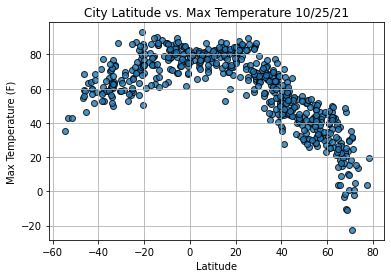

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

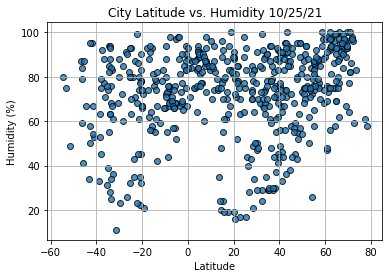

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

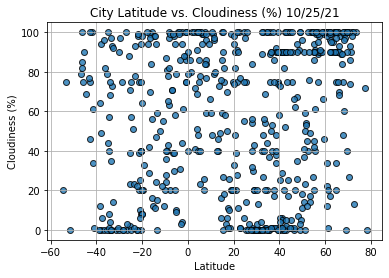

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

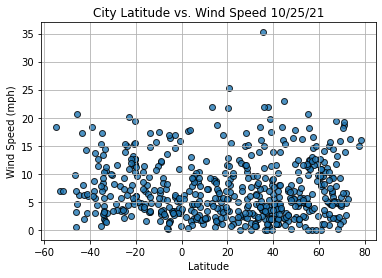

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()